In [35]:
import pandas as pd
import matplotlib as plt
import numpy as np
import sklearn

In [101]:
tdata = pd.read_csv("titanic_data/train.csv")

In [95]:
# tdata.head()

In [96]:
# tdata.shape

In [97]:
tdata.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [94]:
tdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
 11  title        891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Missing Values analysis

There are two columns with significan number of missing Values Age and Cabin.

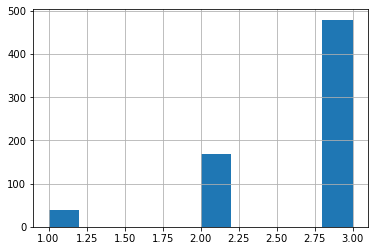

In [40]:
tdata.Cabin.value_counts() # Cabin has many NaN values, are the missing values related to the class?
tdata[tdata.Cabin.isnull()].Pclass.hist() # histogram of the missing values across classes

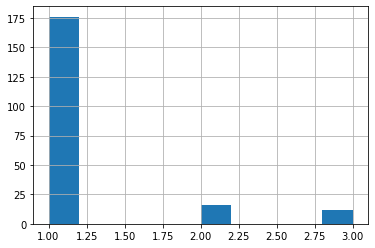

In [41]:
tdata[~tdata.Cabin.isnull()].Pclass.hist() # histogram of the non missing values across classes

- It seems that the missing values of the cabin are mainly in the third and second class, perhaps there where no cabin names for those classes or where not registered. In any case, it tells us that the spatial distributions of passagers is mainly available for the first class.
- I have no ideas about how to replace the missing values and would exclude them from the analysis unless only the furst class subset is considered.

### Drop Cabin

In [102]:
tdata.drop('Cabin', inplace = True, axis = 1)

## Age

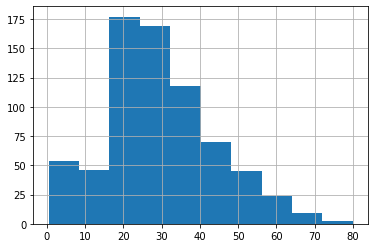

In [47]:
my_hist = tdata.Age.hist()

In [42]:
tdata.describe() # statistical description

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [98]:
# tdata.Fare.value_counts()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa32a9a5630>,
      dtype=object)

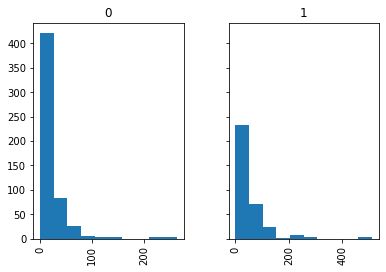

In [238]:
tdata.hist(column = "Fare", by = "Survived",sharey=True)

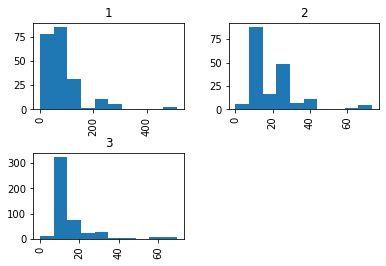

In [237]:
tdata.hist(column = "Fare", by = "Pclass");

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa3565fc358>,
      dtype=object)

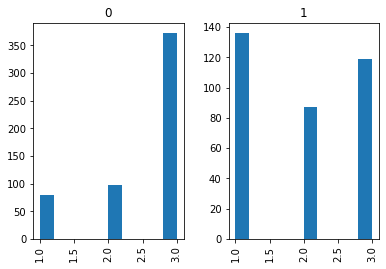

In [46]:
tdata.hist(column = "Pclass", by = "Survived")


In [ ]:
df.reset_index().plot(x="index", y="other column")

In [161]:
# Extract a substring from the name
tdata['title'] = tdata.Name.str.split(", ",n=1,expand=True)[1].str.split(".",n=1,expand=True)[0].astype(str)

In [162]:
tdata.title.value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Col               2
Major             2
Mme               1
the Countess      1
Jonkheer          1
Ms                1
Don               1
Capt              1
Lady              1
Sir               1
Name: title, dtype: int64

In [163]:
tdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
 11  title        891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [164]:
tdata.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr


ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not ['male' 'female' 'female' 'female' 'male' 'male' 'male' 'male' 'female'
 'female' 'female' 'female' 'male' 'male' 'female' 'female' 'male' 'male'
 'female' 'female' 'male' 'male' 'female' 'male' 'female' 'female' 'male'
 'male' 'female' 'male' 'male' 'female' 'female' 'male' 'male' 'male'
 'male' 'male' 'female' 'female' 'female' 'female' 'male' 'female'
 'female' 'male' 'male' 'female' 'male' 'female' 'male' 'male' 'female'
 'female' 'male' 'male' 'female' 'male' 'female' 'male' 'male' 'female'
 'male' 'male' 'male' 'male' 'female' 'male' 'female' 'male' 'male'
 'female' 'male' 'male' 'male' 'male' 'male' 'male' 'male' 'female' 'male'
 'male' 'female' 'male' 'female' 'female' 'male' 'male' 'female' 'male'
 'male' 'male' 'male' 'male' 'male' 'male' 'male' 'male' 'female' 'male'
 'female' 'male' 'male' 'male' 'male' 'male' 'female' 'male' 'male'
 'female' 'male' 'female' 'male' 'female' 'female' 'male' 'male' 'male'
 'male' 'female' 'male' 'male' 'male' 'female' 'male' 'male' 'male' 'male'
 'female' 'male' 'male' 'male' 'female' 'female' 'male' 'male' 'female'
 'male' 'male' 'male' 'female' 'female' 'female' 'male' 'male' 'male'
 'male' 'female' 'male' 'male' 'male' 'female' 'male' 'male' 'male' 'male'
 'female' 'male' 'male' 'male' 'male' 'female' 'male' 'male' 'male' 'male'
 'female' 'female' 'male' 'male' 'male' 'male' 'female' 'male' 'male'
 'male' 'male' 'female' 'male' 'male' 'female' 'male' 'male' 'male'
 'female' 'male' 'female' 'male' 'male' 'male' 'female' 'male' 'female'
 'male' 'female' 'female' 'male' 'male' 'female' 'female' 'male' 'male'
 'male' 'male' 'male' 'female' 'male' 'male' 'female' 'male' 'male'
 'female' 'male' 'male' 'male' 'female' 'female' 'male' 'female' 'male'
 'male' 'male' 'male' 'male' 'male' 'male' 'male' 'male' 'male' 'female'
 'female' 'male' 'male' 'female' 'male' 'female' 'male' 'female' 'male'
 'male' 'female' 'female' 'male' 'male' 'male' 'male' 'female' 'female'
 'male' 'male' 'male' 'female' 'male' 'male' 'female' 'female' 'female'
 'female' 'female' 'female' 'male' 'male' 'male' 'male' 'female' 'male'
 'male' 'male' 'female' 'female' 'male' 'male' 'female' 'male' 'female'
 'female' 'female' 'male' 'male' 'female' 'male' 'male' 'male' 'male'
 'male' 'male' 'male' 'male' 'male' 'female' 'female' 'female' 'male'
 'female' 'male' 'male' 'male' 'female' 'male' 'female' 'female' 'male'
 'male' 'female' 'male' 'male' 'female' 'female' 'male' 'female' 'female'
 'female' 'female' 'male' 'male' 'female' 'female' 'male' 'female'
 'female' 'male' 'male' 'female' 'female' 'male' 'female' 'male' 'female'
 'female' 'female' 'female' 'male' 'male' 'male' 'female' 'male' 'male'
 'female' 'male' 'male' 'male' 'female' 'male' 'male' 'male' 'female'
 'female' 'female' 'male' 'male' 'male' 'male' 'male' 'male' 'male' 'male'
 'female' 'female' 'female' 'female' 'male' 'male' 'female' 'male' 'male'
 'male' 'female' 'female' 'female' 'female' 'male' 'male' 'male' 'male'
 'female' 'female' 'female' 'male' 'male' 'male' 'female' 'female' 'male'
 'female' 'male' 'male' 'male' 'female' 'male' 'female' 'male' 'male'
 'male' 'female' 'female' 'male' 'female' 'male' 'male' 'female' 'male'
 'male' 'female' 'male' 'female' 'male' 'male' 'male' 'male' 'female'
 'male' 'male' 'female' 'male' 'male' 'female' 'female' 'female' 'male'
 'female' 'male' 'male' 'male' 'female' 'male' 'male' 'female' 'female'
 'male' 'male' 'male' 'female' 'female' 'male' 'male' 'female' 'female'
 'female' 'male' 'male' 'female' 'male' 'male' 'female' 'male' 'male'
 'female' 'male' 'female' 'male' 'male' 'male' 'male' 'male' 'male' 'male'
 'male' 'female' 'female' 'male' 'male' 'male' 'male' 'male' 'male' 'male'
 'male' 'male' 'male' 'female' 'male' 'male' 'female' 'female' 'female'
 'male' 'male' 'male' 'male' 'female' 'male' 'male' 'male' 'female' 'male'
 'female' 'female' 'male' 'male' 'male' 'male' 'male' 'male' 'male' 'male'
 'male' 'female' 'male' 'female' 'male' 'male' 'female' 'female' 'female'
 'female' 'male' 'female' 'male' 'male' 'male' 'male' 'male' 'male'
 'female' 'male' 'male' 'female' 'male' 'female' 'male' 'female' 'male'
 'male' 'female' 'male' 'male' 'female' 'male' 'male' 'male' 'female'
 'male' 'male' 'female' 'female' 'female' 'male' 'female' 'male' 'female'
 'female' 'female' 'female' 'male' 'male' 'male' 'female' 'male' 'male'
 'male' 'male' 'male' 'male' 'male' 'female' 'male' 'female' 'male'
 'female' 'female' 'male' 'male' 'male' 'male' 'female' 'male' 'male'
 'female' 'male' 'male' 'male' 'female' 'male' 'female' 'male' 'male'
 'female' 'female' 'female' 'male' 'female' 'female' 'male' 'male' 'male'
 'female' 'male' 'male' 'male' 'male' 'male' 'female' 'male' 'female'
 'male' 'male' 'female' 'male' 'male' 'male' 'female' 'male' 'male' 'male'
 'male' 'male' 'male' 'male' 'female' 'female' 'female' 'male' 'female'
 'male' 'male' 'female' 'male' 'female' 'female' 'male' 'male' 'male'
 'male' 'male' 'male' 'male' 'male' 'female' 'male' 'male' 'male' 'male'
 'male' 'male' 'female' 'female' 'male' 'male' 'female' 'male' 'male'
 'female' 'female' 'male' 'female' 'male' 'male' 'male' 'male' 'female'
 'male' 'female' 'male' 'female' 'female' 'male' 'male' 'female' 'male'
 'male' 'male' 'male' 'male' 'male' 'male' 'male' 'male' 'male' 'male'
 'female' 'female' 'male' 'male' 'male' 'male' 'male' 'male' 'female'
 'female' 'male' 'female' 'male' 'male' 'male' 'male' 'male' 'male' 'male'
 'male' 'female' 'male' 'female' 'male' 'male' 'male' 'male' 'male'
 'female' 'male' 'male' 'female' 'male' 'female' 'male' 'male' 'male'
 'female' 'male' 'female' 'male' 'female' 'male' 'male' 'male' 'male'
 'male' 'female' 'female' 'male' 'male' 'female' 'male' 'male' 'male'
 'male' 'male' 'female' 'female' 'male' 'female' 'female' 'male' 'male'
 'male' 'male' 'male' 'female' 'male' 'male' 'male' 'male' 'male' 'female'
 'male' 'male' 'male' 'male' 'female' 'male' 'male' 'female' 'male' 'male'
 'male' 'female' 'male' 'male' 'male' 'male' 'female' 'male' 'male' 'male'
 'female' 'male' 'female' 'male' 'female' 'male' 'male' 'male' 'male'
 'female' 'male' 'female' 'male' 'male' 'female' 'male' 'female' 'female'
 'female' 'male' 'male' 'male' 'male' 'female' 'male' 'male' 'male' 'male'
 'male' 'female' 'male' 'male' 'male' 'female' 'female' 'male' 'female'
 'male' 'female' 'male' 'male' 'male' 'male' 'male' 'female' 'male'
 'female' 'male' 'male' 'male' 'female' 'male' 'male' 'female' 'male'
 'male' 'male' 'female' 'male' 'male' 'female' 'male' 'male' 'male' 'male'
 'male' 'female' 'female' 'male' 'male' 'male' 'male' 'female' 'male'
 'male' 'male' 'male' 'male' 'male' 'female' 'male' 'male' 'male' 'male'
 'male' 'male' 'female' 'male' 'male' 'female' 'female' 'female' 'female'
 'female' 'male' 'female' 'male' 'male' 'male' 'female' 'female' 'male'
 'female' 'female' 'male' 'male' 'male' 'male' 'female' 'male' 'male'
 'female' 'female' 'male' 'male' 'male' 'female' 'female' 'male' 'female'
 'male' 'male' 'female' 'male' 'female' 'female' 'male' 'male']

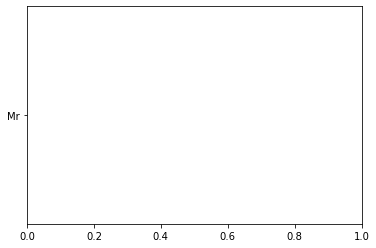

In [240]:
tdata.plot.scatter(x="Age",y="title",c="Sex")

In [236]:
# tdata.Age[tdata.title=="Master"]

In [201]:
cmap = plt.cm.get_cmap('Spectral')

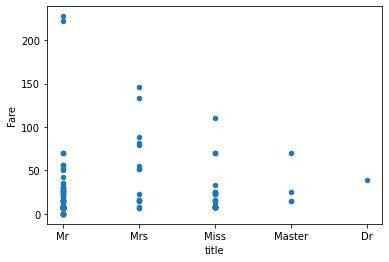

In [209]:
tdata[tdata.Age.isnull()].plot.scatter(x="title",y="Fare")

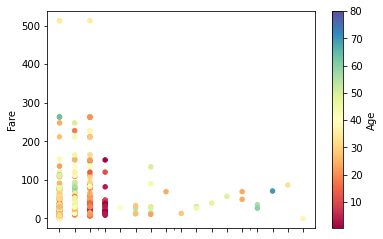

In [230]:
tdata.plot.scatter(x="title",y="Fare",c="Age",cmap = cmap)

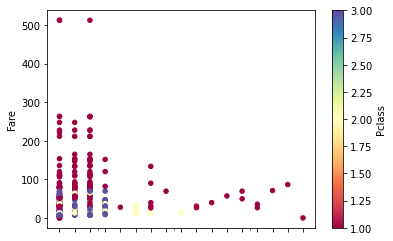

In [235]:
tdata.plot.scatter(x="title",y="Fare",c="Pclass",cmap = cmap)

# New plots

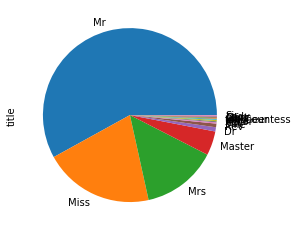

In [234]:
tdata.title.value_counts().plot.pie()

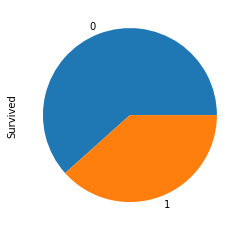

In [218]:
tdata.Survived.value_counts().plot.pie()

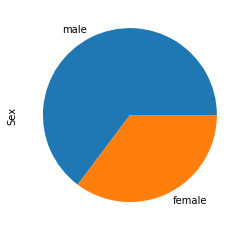

In [219]:
tdata.Sex.value_counts().plot.pie()

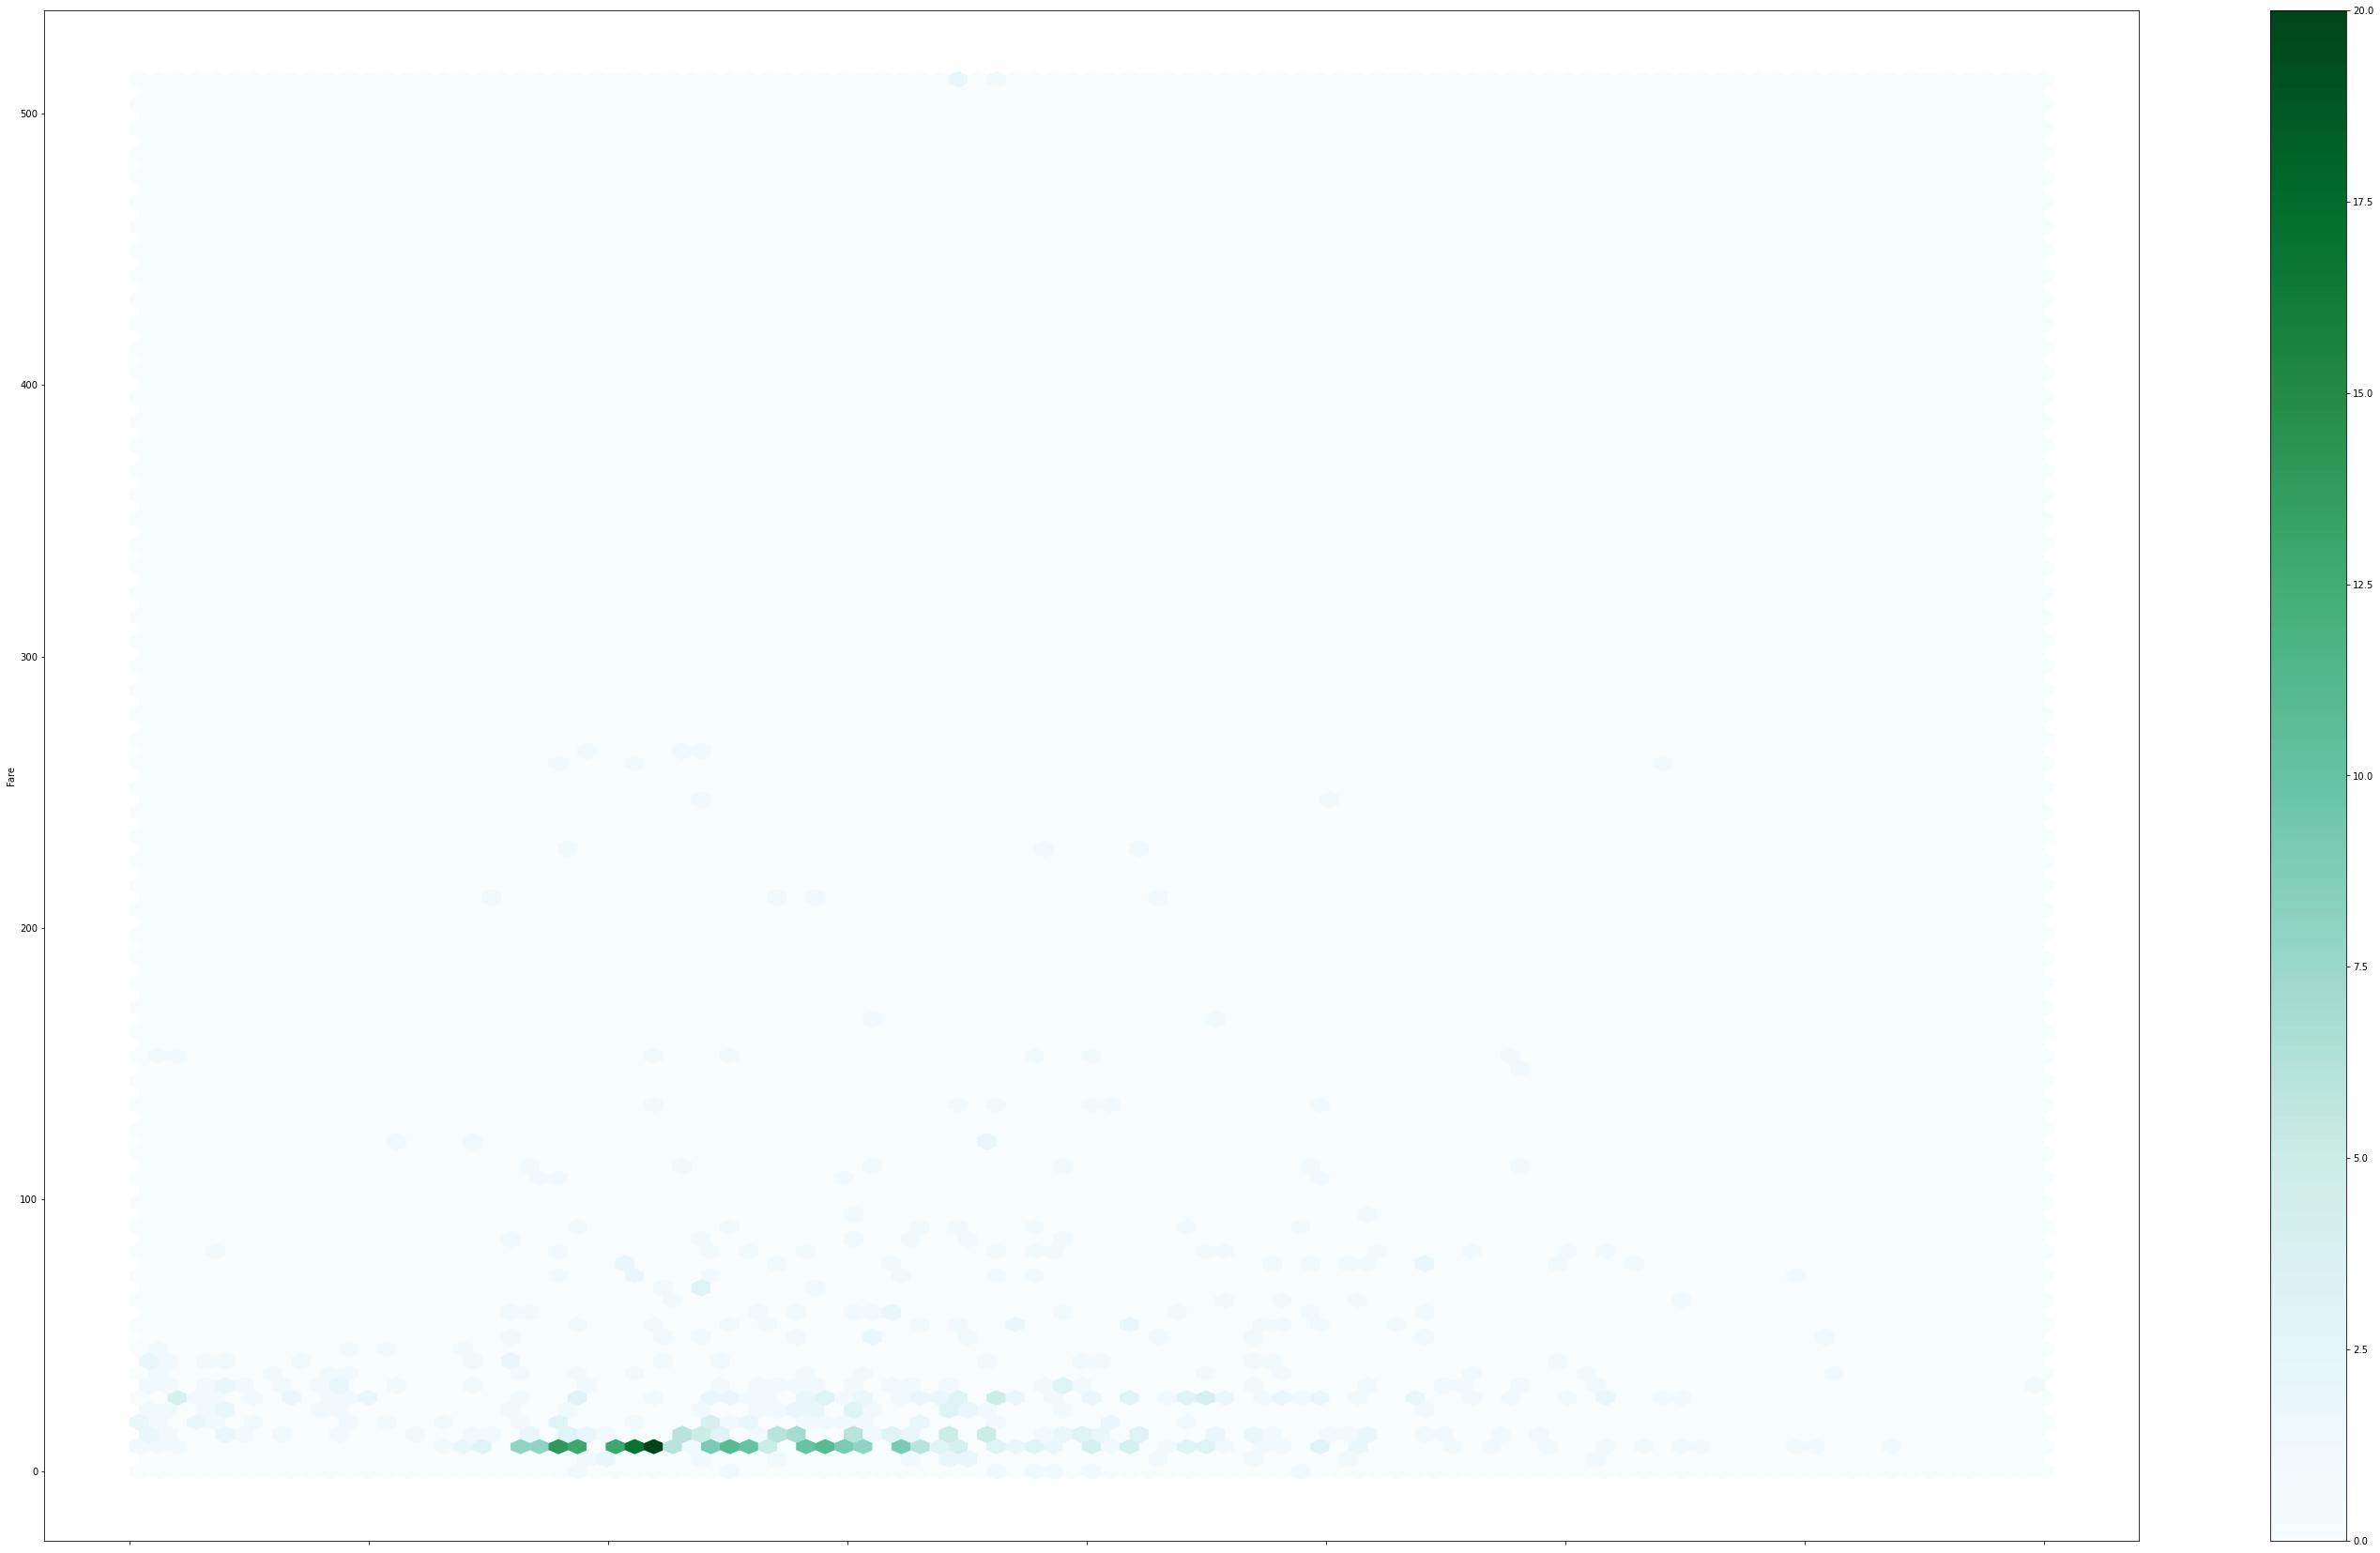

In [223]:
tdata.plot(x="Age",y="Fare", kind="hexbin",figsize = (50,30))